In [1]:
!python -V

Python 3.9.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
from collections import Counter
%matplotlib inline

In [3]:
n = 8921483 #number of records in file
s = int(n/100) #desired sample size
random.seed(10)
skiprows = sorted(random.sample(range(1, n), n-s))
df = pd.read_csv('../data/raw/train.csv.gz', compression='gzip', skiprows=skiprows)

C:\Users\marco\anaconda3\envs\capstone2env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(89214, 83)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89214 entries, 0 to 89213
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  89214 non-null  object 
 1   ProductName                                        89214 non-null  object 
 2   EngineVersion                                      89214 non-null  object 
 3   AppVersion                                         89214 non-null  object 
 4   AvSigVersion                                       89214 non-null  object 
 5   IsBeta                                             89214 non-null  int64  
 6   RtpStateBitfield                                   88878 non-null  float64
 7   IsSxsPassiveMode                                   89214 non-null  int64  
 8   DefaultBrowsersIdentifier                          4424 non-null   float64
 9   AVProd

Features groups:
- machine specs
- geo
- app
- AV
- browser

In [6]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000a59784f4658c3a9820d801cc6e28,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1140.0,0,7.0,0,NaN,53447.0,...,21034.0,0,NaN,0.0,0,0,0.0,0.0,11.0,0
1,0002028c541ff91b6e5da2f5c24f681c,win8defender,1.1.15100.1,4.18.1806.18062,1.273.371.0,0,7.0,0,NaN,23657.0,...,20106.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0
2,000218dfe2a12236d5df04b72caf445a,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1105.0,0,7.0,0,NaN,23962.0,...,66801.0,1,NaN,0.0,0,0,0.0,0.0,5.0,0
3,00034ca6e010a33b7fae245118e51138,win8defender,1.1.15100.1,4.9.10586.0,1.273.1405.0,0,7.0,0,NaN,46669.0,...,69498.0,1,0.0,0.0,0,0,0.0,0.0,10.0,1
4,0004273d2a0fa98a71102d01a6569130,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1208.0,0,7.0,0,NaN,53447.0,...,33120.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1


In [7]:
round(df.HasDetections.mean(), 2), df.HasDetections.isnull().sum()

(0.5, 0)

In [8]:
missing_df = pd.concat([df.isnull().sum(), round(df.isnull().mean() * 100, 2)], axis=1)
missing_df.columns = ['missing_count', '%']
missing_df.sort_values(by='missing_count', ascending=False)[:15]

,missing_count,%
PuaMode,89193,99.98
Census_ProcessorClass,88823,99.56
DefaultBrowsersIdentifier,84790,95.04
Census_IsFlightingInternal,74134,83.10
Census_InternalBatteryType,63316,70.97
Census_ThresholdOptIn,56735,63.59
Census_IsWIMBootEnabled,56643,63.49
SmartScreen,32004,35.87
OrganizationIdentifier,27331,30.64
SMode,5462,6.12


In [9]:
missing_list = missing_df[missing_df['%']>40].index.tolist()
missing_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [10]:
df[missing_list].nunique()

DefaultBrowsersIdentifier     252
PuaMode                         1
Census_ProcessorClass           3
Census_InternalBatteryType     19
Census_IsFlightingInternal      1
Census_ThresholdOptIn           2
Census_IsWIMBootEnabled         1
dtype: int64

In [11]:
df = df.drop(missing_list, axis=1)

In [12]:
df.duplicated(keep=False).sum()

0

In [13]:
df['MachineIdentifier'].nunique()

89214

In [14]:
df = df.drop('MachineIdentifier', axis=1)

# Categorical Features

In [15]:
cat_col = df.select_dtypes('object').columns.tolist()
cat_col_df = df[cat_col] 
cat_col_df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1140.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.285,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Volume:GVLK,Retail
1,win8defender,1.1.15100.1,4.18.1806.18062,1.273.371.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1105.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail
3,win8defender,1.1.15100.1,4.9.10586.0,1.273.1405.0,windows10,x64,10.0.0.0,th2,10586.0.amd64fre.th2_release.151029-1700,Home,...,10.0.10586.0,amd64,th2_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,UNKNOWN,IS_GENUINE,OEM:DM,Retail
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1208.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.48,amd64,rs4_release,ProfessionalN,PROFESSIONAL_N,IBSClean,UNKNOWN,IS_GENUINE,Retail,Unknown


In [16]:
cat_col_df.describe().T

,count,unique,top,freq
ProductName,89214,3,win8defender,88213
EngineVersion,89214,40,1.1.15200.1,38090
AppVersion,89214,73,4.18.1807.18075,51203
AvSigVersion,89214,3857,1.273.1420.0,1015
Platform,89214,4,windows10,86047
Processor,89214,3,x64,80989
OsVer,89214,8,10.0.0.0,86175
OsPlatformSubRelease,89214,9,rs4,38933
OsBuildLab,89214,355,17134.1.amd64fre.rs4_release.180410-1804,36318
SkuEdition,89214,8,Home,55186


In [17]:
n_unique_list = cat_col_df.nunique().sort_values(ascending=False)
n_unique_list[:20]

AvSigVersion                        3857
OsBuildLab                           355
Census_OSVersion                     252
AppVersion                            73
EngineVersion                         40
Census_ChassisTypeName                28
Census_OSEdition                      21
Census_OSSkuName                      20
Census_OSBranch                       15
Census_MDC2FormFactor                 11
SmartScreen                           11
OsPlatformSubRelease                   9
Census_PowerPlatformRoleName           9
Census_OSInstallTypeName               9
SkuEdition                             8
OsVer                                  8
Census_FlightRing                      7
Census_OSWUAutoUpdateOptionsName       6
Census_ActivationChannel               6
Census_GenuineStateName                4
dtype: int64

In [18]:
high_cardinality_features = n_unique_list[n_unique_list > 15]
high_cardinality_features.index.tolist()

['AvSigVersion',
 'OsBuildLab',
 'Census_OSVersion',
 'AppVersion',
 'EngineVersion',
 'Census_ChassisTypeName',
 'Census_OSEdition',
 'Census_OSSkuName']

In [19]:
for col in cat_col:
    print(f'Feature: {col} \nValue counts:\n{df[col].value_counts()}\n\n')   

Feature: ProductName 
Value counts:
win8defender    88213
mse              1000
scep                1
Name: ProductName, dtype: int64


Feature: EngineVersion 
Value counts:
1.1.15200.1    38090
1.1.15100.1    36948
1.1.15000.2     2605
1.1.14901.4     2230
1.1.14600.4     1564
1.1.14800.3     1374
1.1.15300.6     1239
1.1.14104.0      958
1.1.13504.0      755
1.1.15300.5      663
1.1.14700.5      487
1.1.14500.5      475
1.1.14405.2      377
1.1.14306.0      256
1.1.14202.0      173
1.1.14003.0      124
1.1.13407.0      100
1.1.13303.0       95
1.1.13804.0       95
1.1.13903.0       93
1.1.13601.0       64
1.1.12902.0       62
1.1.14305.0       56
1.1.13202.0       51
1.1.13000.0       49
1.1.13704.0       45
1.1.13103.0       41
1.1.13701.0       38
1.1.12805.0       29
1.1.15000.1       22
1.1.14700.3       15
1.1.14700.4       10
1.1.14901.3       10
1.1.14800.1        8
1.1.14500.2        3
1.1.14201.0        3
1.1.14303.0        2
1.1.11701.0        2
1.1.14103.0        2
1.1.141

Feature: Census_OSWUAutoUpdateOptionsName 
Value counts:
FullAuto                                 39572
UNKNOWN                                  25188
Notify                                   20354
AutoInstallAndRebootAtMaintenanceTime     3685
Off                                        280
DownloadNotify                             135
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64


Feature: Census_GenuineStateName 
Value counts:
IS_GENUINE         78801
INVALID_LICENSE     8001
OFFLINE             2260
UNKNOWN              152
Name: Census_GenuineStateName, dtype: int64


Feature: Census_ActivationChannel 
Value counts:
Retail            47401
OEM:DM            33979
Volume:GVLK        4510
OEM:NONSLP         3208
Volume:MAK           74
Retail:TB:Eval       42
Name: Census_ActivationChannel, dtype: int64


Feature: Census_FlightRing 
Value counts:
Retail      83497
NOT_SET      2903
Unknown      2442
WIF           111
WIS           110
RP            110
Disabled       41
Name

# Numerical features

In [20]:
num_col = [col for col in df.columns.tolist() if col not in cat_col]
df[num_col].head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,53447.0,1.0,1.0,1,94,65823.0,NaN,...,355.0,21034.0,0,0.0,0,0,0.0,0.0,11.0,0
1,0,7.0,0,23657.0,2.0,1.0,1,139,87570.0,NaN,...,355.0,20106.0,0,0.0,0,0,0.0,1.0,1.0,0
2,0,7.0,0,23962.0,2.0,1.0,1,123,94381.0,NaN,...,440.0,66801.0,1,0.0,0,0,0.0,0.0,5.0,0
3,0,7.0,0,46669.0,2.0,1.0,1,85,NaN,27.0,...,142.0,69498.0,1,0.0,0,0,0.0,0.0,10.0,1
4,0,7.0,0,53447.0,1.0,1.0,1,50,105713.0,27.0,...,554.0,33120.0,0,0.0,0,0,0.0,0.0,3.0,1


In [21]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,89214.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.000000e+00,0.000000e+00
RtpStateBitfield,88878.0,6.847263e+00,1.018277e+00,0.0,7.00,7.0,7.000000e+00,8.000000e+00
IsSxsPassiveMode,89214.0,1.681350e-02,1.285729e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
AVProductStatesIdentifier,88849.0,4.786345e+04,1.401683e+04,23.0,49480.00,53447.0,5.344700e+04,7.046900e+04
AVProductsInstalled,88849.0,1.325519e+00,5.220829e-01,1.0,1.00,1.0,2.000000e+00,6.000000e+00
AVProductsEnabled,88849.0,1.021362e+00,1.676583e-01,0.0,1.00,1.0,1.000000e+00,5.000000e+00
HasTpm,89214.0,9.875356e-01,1.109468e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,89214.0,1.076928e+02,6.289845e+01,1.0,51.00,97.0,1.600000e+02,2.220000e+02
CityIdentifier,85951.0,8.125057e+04,4.902199e+04,41.0,36825.00,82373.0,1.240210e+05,1.679530e+05
OrganizationIdentifier,61883.0,2.490361e+01,5.580480e+00,1.0,18.00,27.0,2.700000e+01,5.200000e+01


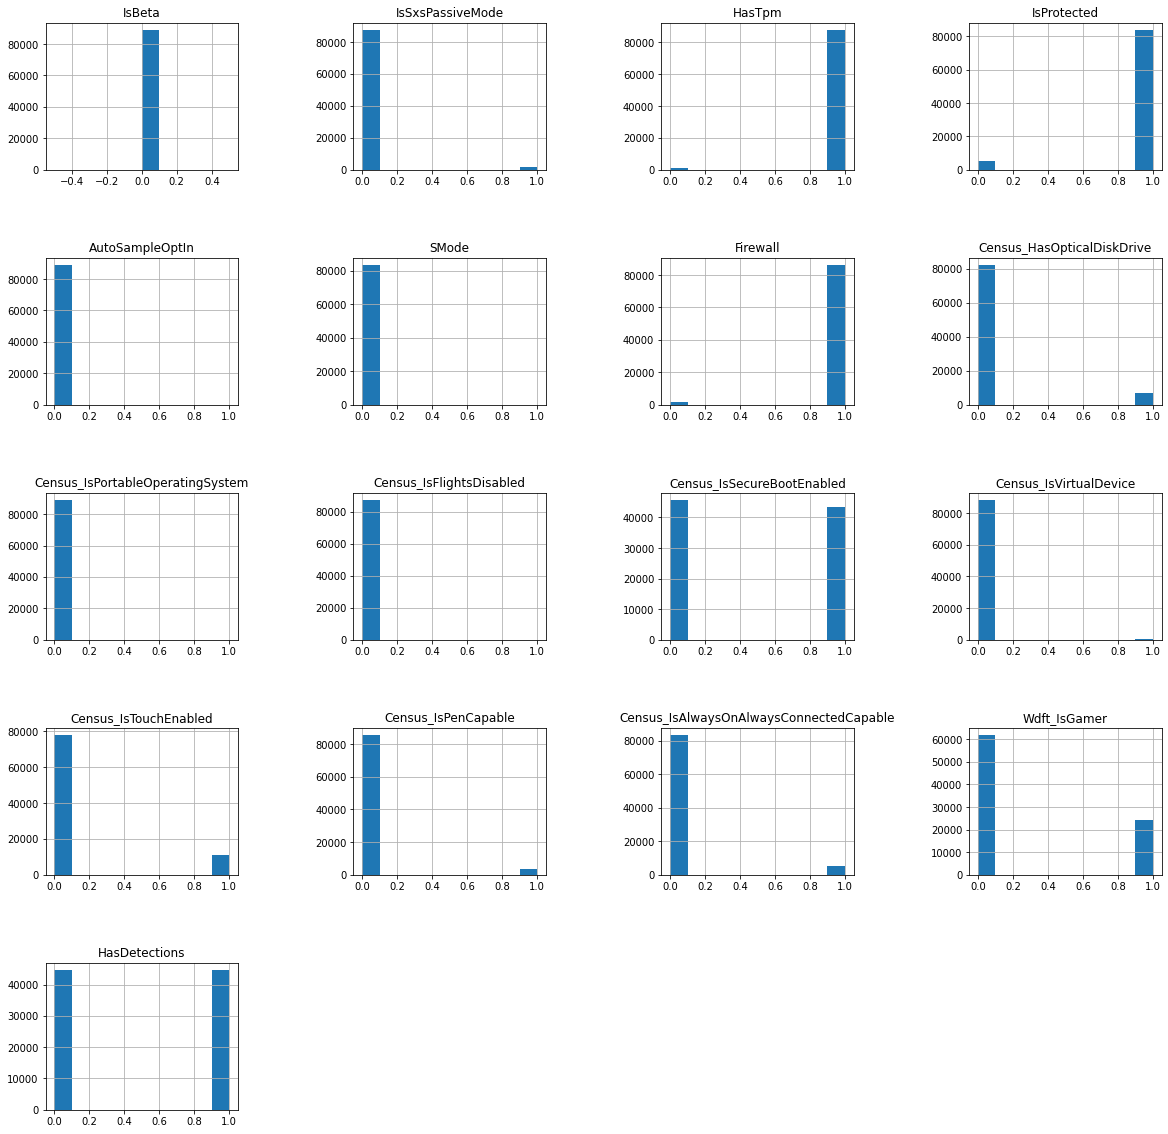

In [22]:
binary_feat = [col for col in num_col if df[col].nunique() <= 2]
df[binary_feat].hist(figsize=(20, 20))
plt.subplots_adjust(hspace=.6, wspace=.6)

In [23]:
to_drop = [feat for feat in binary_feat if df[feat].var() < .01]
to_drop

['IsBeta',
 'AutoSampleOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice']

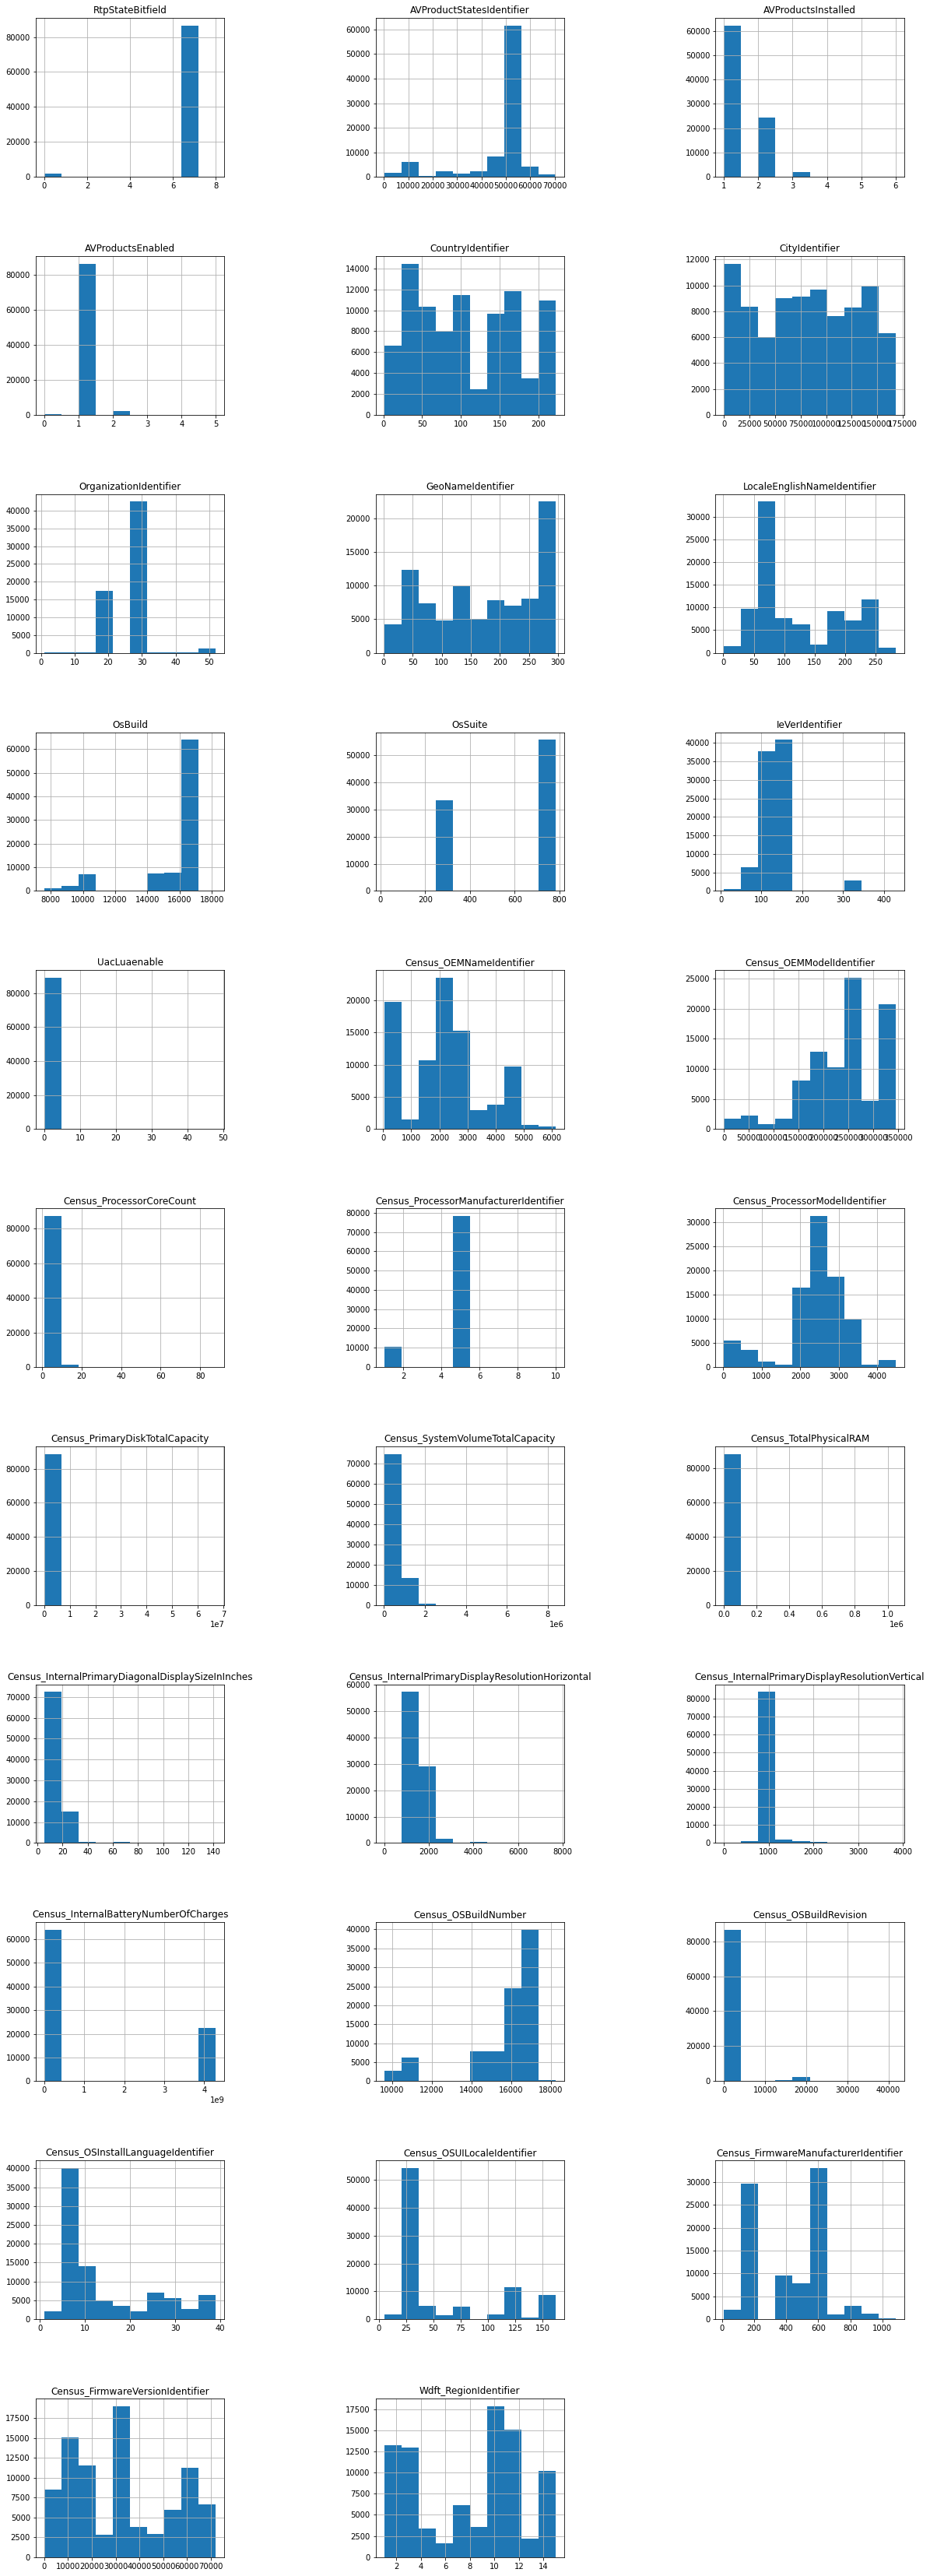

In [24]:
df.loc[:, ~df.columns.isin(binary_feat)].hist(figsize=(20, 60), layout=(11, 3))
plt.subplots_adjust(hspace=.5, wspace=.8)

Summary of numerical features and potential issues:
   - **RtpStateBitfield**: no info in metadata. The most frequent value is 7.
   - **AVProductStatesIdentifier**: these are ID's for the specific configuration of a user's antivirus software. Should treat it as categorical feature. Most ID values around 53000.
   - **AVProductsInstalled** and **AVProductsEnabled**: no info in metadata. Probably a count of Anti Virus Products Installed and Enabled. Likely correlated. Most of values are 1 or 2 then large left skew. 
   - **CountryIdentifier**, **CityIdentifier**,  **GeoNameIdentifier**, **LocaleEnglishNameIdentifier**: these are all ID's taking many values and all related to physical location of a machine.
   - **OrganizationIdentifier**: ID for the organization the machine belongs in. Most values are 20 and 30, could reduce to three classes: 20, 30, others.
   - **OsBuild** and **OsSuite**: these are again ID's of Product build and suite mask for the current operating system. OsSuite has mainly two classes.
   - **IeVerIdentifier** no info in metadata. Might have outliers  for values > 300.
   - **UacLuaenable**: has outliers and/or extremely rare values.
   - **Census_OEMNameIdentifier**, **Census_OEMModelIdentifier**: no info in metadata. Should be ID for original equipment manufacturer OEM name and model.
   - **Census_ProcessorCoreCount**: Actual number of logical cores in the processor. Most machines have < 20 cores. There are outliers maybe because of supercomputers.
   - **Census_ProcessorManufacturerIdentifier**, **Census_ProcessorModelIdentifier**: no info in metadata. Should be ID for processor manufacturer and model.
   - **Census_PrimaryDiskTotalCapacity**, **Census_SystemVolumeTotalCapacity**, **Census_TotalPhysicalRAM**: these are actual numerics in MB of memory. They are likely correlated and have outliers.
   - **Census_InternalPrimaryDiagonalDisplaySizeInInches**, **Census_InternalPrimaryDisplayResolutionHorizontal**, **Census_InternalPrimaryDisplayResolutionVertical**: these are dims and resolution of display. Should not be correlated with malware infections. Contain outliers.
   - **Census_InternalBatteryNumberOfCharges**: no info in metadata. It has mostly very small or very big values. Might convert it to binary feature.
   - All features with "OS" or "Os", i.e. those related to Operating System, present repetitions since some have been extracted from **OsVer** and **OsBuildLab**. I will need to drop these repetitions.
   - **Census_FirmwareManufacturerIdentifier**, **Census_FirmwareVersionIdentifier**no info in metadata. Should be ID's of Firmware Manufacturer and version.
   - **Wdft_RegionIdentifier**: no info in metadata. Should be another ID.
   
    Key points:
    1. Many features have outliers / extremely skewed distributions  
    2. A few features are repeted / duplicates of other categorical features - see OS features
    3. Most of the numerical features are actually categories / ID's encoded as numbers
    4. Actual numerical features are: 
        - Census_ProcessorCoreCount
        - Census_PrimaryDiskTotalCapacity
        - Census_SystemVolumeTotalCapacity
        - Census_TotalPhysicalRAM
        - Census_InternalPrimaryDiagonalDisplaySizeInInches
        - Census_InternalPrimaryDisplayResolutionHorizontal
        - Census_InternalPrimaryDisplayResolutionVertical
        - Census_InternalBatteryNumberOfCharges

Let's fix some of this problems, starting with checking obvious outliers and extremely skewed distributions. I will add the features which are not usefull to the analysis to the list to_drop and fix outliers for the other features which may have predictive power.

**RtpStateBitfiels**

In [25]:
pd.crosstab(df.RtpStateBitfield, df.HasDetections, margins=True)

HasDetections,0,1,All
RtpStateBitfield,,,
0.0,1128,754,1882
1.0,6,8,14
3.0,19,14,33
5.0,159,35,194
7.0,42972,43580,86552
8.0,57,146,203
All,44341,44537,88878


**UacLuaenable**

In [26]:
pd.crosstab(df.UacLuaenable, df.HasDetections, margins=True)

HasDetections,0,1,All
UacLuaenable,,,
0.0,277,259,536
1.0,44191,44362,88553
48.0,2,2,4
All,44470,44623,89093


In [27]:
to_drop.append('UacLuaenable')

**AVProductsEnabled**

In [28]:
pd.crosstab(df.AVProductsEnabled, df.HasDetections, margins=True) 

HasDetections,0,1,All
AVProductsEnabled,,,
0.0,155,90,245
1.0,42783,43747,86530
2.0,1325,685,2010
3.0,41,19,60
4.0,3,0,3
5.0,1,0,1
All,44308,44541,88849


**Census_ProcessorCoreCount**

<AxesSubplot:>

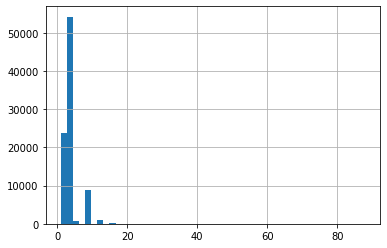

In [29]:
df.Census_ProcessorCoreCount.hist(bins=50)

In [30]:
pd.crosstab(df.Census_ProcessorCoreCount, df.HasDetections, margins=True) 

HasDetections,0,1,All
Census_ProcessorCoreCount,,,
1.0,489,232,721
2.0,12483,10680,23163
3.0,62,69,131
4.0,26590,27514,54104
5.0,2,1,3
6.0,287,383,670
7.0,0,2,2
8.0,3889,4835,8724
10.0,1,0,1


Very few machines have more than 16 cores. I will not change this feature for now.

**Census_PrimaryDiskTotalCapacity**

<AxesSubplot:>

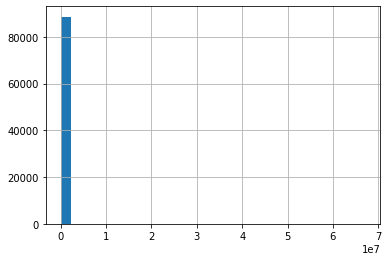

In [31]:
df.Census_PrimaryDiskTotalCapacity.hist(bins=30)

Use 16 TB = 16 $\times$ 10$^{6}$ MB as limit for outliers

In [32]:
limit = 16*10**6
df.loc[df['Census_PrimaryDiskTotalCapacity'] > limit, 'Census_PrimaryDiskTotalCapacity']

49628    67108864.0
Name: Census_PrimaryDiskTotalCapacity, dtype: float64

<AxesSubplot:>

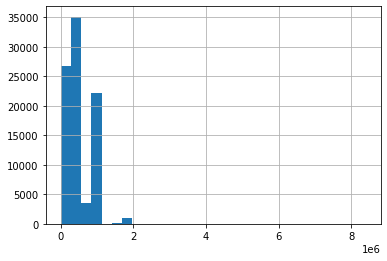

In [33]:
df.loc[df['Census_PrimaryDiskTotalCapacity'] > limit, 'Census_PrimaryDiskTotalCapacity'] = np.nan
df.Census_PrimaryDiskTotalCapacity.hist(bins=30)

**Census_SystemVolumeTotalCapacity**

<AxesSubplot:>

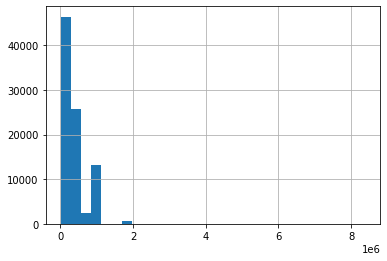

In [34]:
df.Census_SystemVolumeTotalCapacity.hist(bins=30)

<AxesSubplot:>

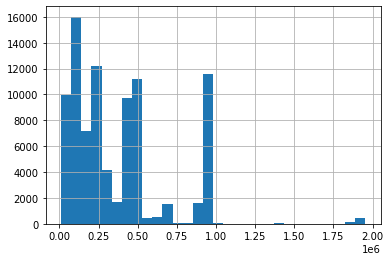

In [35]:
vol_limit = 2e6
df.loc[df['Census_SystemVolumeTotalCapacity'] > vol_limit, 'Census_SystemVolumeTotalCapacity'] = np.nan
df.Census_SystemVolumeTotalCapacity.hist(bins=30)

**Census_TotalPhysicalRAM**

<AxesSubplot:>

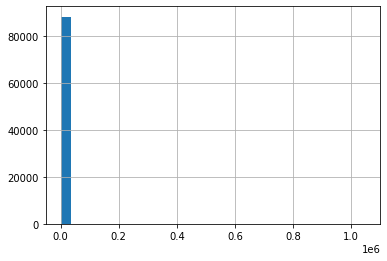

In [36]:
df.Census_TotalPhysicalRAM.hist(bins=30)

In [37]:
df.Census_TotalPhysicalRAM.value_counts()

4096.0      40997
8192.0      21808
2048.0      10939
16384.0      5358
6144.0       4101
            ...  
153599.0        1
4024.0          1
10578.0         1
6955.0          1
6207.0          1
Name: Census_TotalPhysicalRAM, Length: 179, dtype: int64

In [38]:
bins = [0,
        2_000,
        4_000,
        8_000,
        16_000,
        32_000,
        64_000,
        128_000,
        192_000,
        512_000,
        1_000_000,
        np.inf]
labels = ['0-2 GB', '2-4 GB', '4-8 GB', '8-16 GB',
          '16-32 GB', '32-64 GB', '64-128 GB', 
          '128-192 GB',  '192-512 GB', '512-1000 GB', 
          '1+ TB']

RAM_bins_df = pd.cut(df.Census_TotalPhysicalRAM,
                     bins=bins,
                     labels=labels)
RAM_bins_df.value_counts()

4-8 GB         45293
8-16 GB        23533
2-4 GB         12565
16-32 GB        5556
0-2 GB           743
32-64 GB         618
64-128 GB         65
128-192 GB        12
192-512 GB         3
512-1000 GB        1
1+ TB              1
Name: Census_TotalPhysicalRAM, dtype: int64

In [39]:
df.Census_TotalPhysicalRAM.max()

1048576.0

Max of about 1 TB is possible for RAM of Windows Servers

**Census_InternalPrimaryDiagonalDisplaySizeInInches**

<AxesSubplot:>

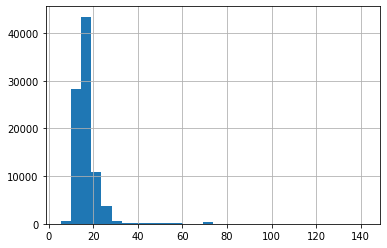

In [40]:
df.Census_InternalPrimaryDiagonalDisplaySizeInInches.hist(bins=30)

Screens with diagonal > 80 inches are rare but a max of 140 inches is possible. Will keep it as is. 

**Census_InternalPrimaryDisplayResolutionHorizontal** and **Census_InternalPrimaryDisplayResolutionVertical**

<AxesSubplot:>

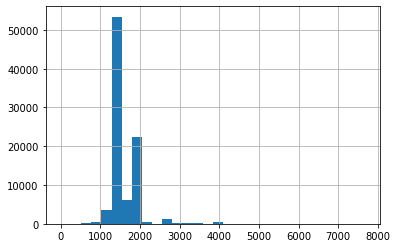

In [41]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.hist(bins=30)

In [42]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.max()

7680.0

<AxesSubplot:>

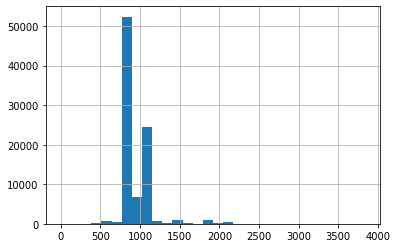

In [43]:
df.Census_InternalPrimaryDisplayResolutionVertical.hist(bins=30)

In [44]:
resolution = ['Census_InternalPrimaryDisplayResolutionHorizontal', 
              'Census_InternalPrimaryDisplayResolutionVertical']
df[df.Census_InternalPrimaryDisplayResolutionHorizontal >5240][resolution]

,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical
8149,5760.0,1080.0
29779,7680.0,1080.0
69292,5760.0,1080.0
87009,5760.0,1080.0


Index 29779 with 7680.0 pixels is a possible value. Keep it for now. 

**Census_InternalBatteryNumberOfCharges**

<AxesSubplot:>

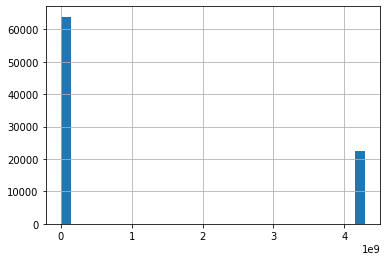

In [45]:
df.Census_InternalBatteryNumberOfCharges.hist(bins=30)

In [46]:
battery_charges_count = df.Census_InternalBatteryNumberOfCharges.value_counts()
battery_charges_count[:20]

0.000000e+00    50507
4.294967e+09    22452
1.000000e+00      536
1.600000e+01      300
2.000000e+00      291
3.000000e+00      223
3.300000e+01      206
4.000000e+00      188
5.000000e+00      173
7.000000e+00      147
6.000000e+00      143
4.294967e+09      128
4.380000e+02      127
1.000000e+01      123
3.740000e+02      123
1.500000e+01      118
8.000000e+00      117
9.000000e+00      105
1.400000e+01      103
2.560000e+02      100
1.300000e+01       97
2.100000e+01       95
1.200000e+01       94
1.100000e+01       92
3.770000e+02       92
2.400000e+01       91
1.800000e+01       90
2.200000e+01       89
1.900000e+01       84
1.700000e+01       83
3.840000e+02       75
2.300000e+01       75
3.500000e+01       74
2.600000e+01       74
2.500000e+01       74
4.350000e+02       73
2.000000e+01       71
Name: Census_InternalBatteryNumberOfCharges, dtype: int64

There is no info about this column, and most values are 0 or 4e9. 

Features regarding OS: check for repetitions of features extracted by **OsBuildLab**

In [47]:
df.loc[:, df.columns.str.contains('OS|Os|os', regex=True)]

,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName
0,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.285,amd64,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,8.0,31,FullAuto
1,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,8.0,31,FullAuto
2,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,14.0,49,FullAuto
3,10.0.0.0,10586,768,th2,10586.0.amd64fre.th2_release.151029-1700,10.0.10586.0,amd64,th2_release,10586,0,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,NaN,34,UNKNOWN
4,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.48,amd64,rs4_release,17134,48,ProfessionalN,PROFESSIONAL_N,IBSClean,3.0,20,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89209,10.0.0.0,16299,256,rs3,16299.15.amd64fre.rs3_release.170928-1534,10.0.16299.248,amd64,rs3_release,16299,248,Professional,PROFESSIONAL,UUPUpgrade,33.0,140,Notify
89210,10.0.0.0,16299,256,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,Professional,PROFESSIONAL,Upgrade,8.0,31,UNKNOWN
89211,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.81,amd64,rs4_release,17134,81,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,8.0,31,UNKNOWN
89212,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,10.0.17134.285,amd64,rs4_release,17134,285,CoreSingleLanguage,CORE_SINGLELANGUAGE,Refresh,8.0,31,FullAuto


In [48]:
df.OsBuildLab.nunique()

355

**OsBuildLab** has very high cardinality. It seems many features are generated by extracting substrings from **OsBuildLab**, e.g. **OsBuild**, **Census_OSArchitecture**, **OsPlatformSubRelease**, etc. Check if these is correct and eliminate redundant features.

**OsPlatformSubRelease**

In [49]:
temp_df = pd.DataFrame()
temp_df['OsBuildLab'] = df['OsBuildLab']
temp_df['OsBuild'] = temp_df.OsBuildLab.str.split('.').str.get(0).astype('int')
temp_df['OsPlatformSubRelease'] = temp_df.OsBuildLab.str.split('.').str.get(3).str.split('_').str.get(0)
temp_df['Census_OSArchitecture'] = temp_df.OsBuildLab.str.split('.').str.get(2).str.replace('fre', '')
temp_df['Census_OSBranch'] = temp_df.OsBuildLab.str.split('.').str.get(3)
temp_df.head()

,OsBuildLab,OsBuild,OsPlatformSubRelease,Census_OSArchitecture,Census_OSBranch
0,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
1,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
2,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release
3,10586.0.amd64fre.th2_release.151029-1700,10586,th2,amd64,th2_release
4,17134.1.amd64fre.rs4_release.180410-1804,17134,rs4,amd64,rs4_release


In [50]:
for col in temp_df.columns:
    if col != 'OsBuildLab':
        print(f'{round(np.mean(df[col] != temp_df[col])*100 ,2)}% of {col} entries are different')

0.0% of OsBuild entries are different
3.66% of OsPlatformSubRelease entries are different
0.16% of Census_OSArchitecture entries are different
11.83% of Census_OSBranch entries are different


In [51]:
def compare_feature(col_name):
    ''' 
    Reads column name (str) 
    Returns a df summarizing comparing original and 
    extracted features, a list of tuples containing the 
    different element, and the count of different elements
    '''
    df_1 = pd.DataFrame(df[df[col_name] != temp_df[col_name]][['OsBuildLab', col_name]].values, columns=['OsBuildLab', col_name+'1'])
    df_2 = pd.DataFrame(temp_df[df[col_name] != temp_df[col_name]][col_name].values, columns=[col_name+'2'])
    comparison_df = pd.concat([df_1, df_2], axis=1)
    comp_list = list(zip(comparison_df.iloc[:, 1], comparison_df.iloc[:, 2]))

    return comparison_df, comp_list, Counter(comp_list)

In [52]:
comparison_df, comp_list, tuple_counts = compare_feature('OsPlatformSubRelease')

In [53]:
comparison_df.head()

,OsBuildLab,OsPlatformSubRelease1,OsPlatformSubRelease2
0,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,windows8.1,winblue
1,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,windows8.1,winblue
2,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,windows8.1,winblue
3,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,windows8.1,winblue
4,9600.18969.amd64fre.winblue_ltsb.180309-0600,windows8.1,winblue


In [54]:
comp_list

[('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('windows8.1', 'winblue'),
 ('prers5', 'rs5'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('windows7', 'win7sp1'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('prers5', 'rs5'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('windows7', 'win7sp1'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows8.1', 'winblue'),
 ('windows7', 'win7sp1'),
 ('windows8.1', 'winblue'),
 

In [55]:
tuple_counts

Counter({('windows8.1', 'winblue'): 2040,
         ('windows7', 'win7sp1'): 983,
         ('prers5', 'rs5'): 165,
         ('windows7', 'win7'): 9,
         ('prers5', 'rs'): 65})

It looks like the values are consistent.

In [56]:
comparison_df, comp_list, tuple_counts = compare_feature('Census_OSArchitecture')
tuple_counts

Counter({('amd64', 'x86'): 66, ('x86', 'amd64'): 79})

It looks like the the 64 and 32 bits are switched occasionally.

In [57]:
comparison_df, comp_list, tuple_counts = compare_feature('Census_OSBranch')
comparison_df

,OsBuildLab,Census_OSBranch1,Census_OSBranch2
0,10240.17443.amd64fre.th1.170602-2340,th1_st1,th1
1,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,th2_release,winblue_ltsb_escrow
2,14393.1198.amd64fre.rs1_release_sec.170427-1353,rs1_release,rs1_release_sec
3,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,rs1_release,winblue_ltsb_escrow
4,10586.420.x86fre.th2_release_sec.160527-1834,th2_release,th2_release_sec
...,...,...,...
10549,9600.19101.amd64fre.winblue_ltsb_escrow.180718...,th2_release,winblue_ltsb_escrow
10550,16299.637.amd64fre.rs3_release_svc.180808-1748,rs3_release,rs3_release_svc
10551,7601.24214.amd64fre.win7sp1_ldr_escrow.180801-...,th2_release,win7sp1_ldr_escrow
10552,16299.15.amd64fre.rs3_release.170928-1534,rs1_release,rs3_release


In [58]:
tuple_counts

Counter({('th1_st1', 'th1'): 1813,
         ('th2_release', 'winblue_ltsb_escrow'): 750,
         ('rs1_release', 'rs1_release_sec'): 380,
         ('rs1_release', 'winblue_ltsb_escrow'): 343,
         ('th2_release', 'th2_release_sec'): 741,
         ('rs1_release', 'rs1_release_inmarket'): 1069,
         ('rs4_release', 'rs3_release'): 448,
         ('rs1_release', 'rs1_release_inmarket_aim'): 63,
         ('rs4_release', 'rs3_release_svc_escrow'): 419,
         ('rs1_release', 'rs1_release_1'): 422,
         ('rs1_release', 'winblue_ltsb'): 109,
         ('th2_release', 'win7sp1_ldr'): 400,
         ('th2_release_sec', 'th2_release'): 472,
         ('rs3_release_svc_escrow', 'rs4_release'): 94,
         ('rs2_release', 'winblue_ltsb_escrow'): 100,
         ('rs3_release', 'rs3_release_svc_escrow'): 376,
         ('rs3_release_svc_escrow', 'rs3_release'): 111,
         ('rs3_release', 'rs4_release'): 109,
         ('rs3_release', 'rs3_release_svc'): 467,
         ('th2_release', 'th1

There are more incosistencies here. I will drop **OsBuildLab** after extracting the **branch release**

In [59]:
df['Census_OSBranch_release_extracted'] = df.OsBuildLab.str.split('.').str.get(3)
df['Census_OSBranch_release_extracted']

0                   rs4_release
1                   rs4_release
2                   rs4_release
3                   th2_release
4                   rs4_release
                  ...          
89209               rs3_release
89210    rs3_release_svc_escrow
89211               rs4_release
89212               rs4_release
89213               rs4_release
Name: Census_OSBranch_release_extracted, Length: 89214, dtype: object

In [60]:
to_drop.append('OsBuildLab')

**OsBuild** and **Census_OSBuildNumber** likely carry same info:

In [61]:
df[df.OsBuild != df.Census_OSBuildNumber][['OsBuild', 'Census_OSBuildNumber']]

,OsBuild,Census_OSBuildNumber
56,9600,10586
63,9600,14393
92,9600,14393
107,9600,10586
117,16299,17134
...,...,...
89150,7601,10586
89156,9600,10586
89160,9600,10586
89172,7601,10586


In [62]:
np.mean(df.OsBuild != df.Census_OSBuildNumber)

0.050967336965050326

In [63]:
df.OsBuild.corr(df.Census_OSBuildNumber)

0.9384602443775911

In [64]:
to_drop.append('Census_OSBuildNumber')

**Census_OSBranch** and **OsPlatformSubRelease**  likely carry same info:

In [65]:
df[df.Census_OSBranch != df.OsPlatformSubRelease][['Census_OSBranch', 'OsPlatformSubRelease']]

,Census_OSBranch,OsPlatformSubRelease
0,rs4_release,rs4
1,rs4_release,rs4
2,rs4_release,rs4
3,th2_release,th2
4,rs4_release,rs4
...,...,...
89209,rs3_release,rs3
89210,rs3_release_svc_escrow,rs3
89211,rs4_release,rs4
89212,rs4_release,rs4


In [66]:
np.mean(df.Census_OSBranch.str.split('_').str.get(0) != df.OsPlatformSubRelease)

0.053141883560876096

In [67]:
to_drop.append('Census_OSBranch')

In [68]:
to_drop

['IsBeta',
 'AutoSampleOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice',
 'UacLuaenable',
 'OsBuildLab',
 'Census_OSBuildNumber',
 'Census_OSBranch']

In [69]:
df = df.drop(to_drop, axis=1)

In [70]:
df.shape

(89214, 66)

In [71]:
numerical_col = ['Census_ProcessorCoreCount',
                 'Census_PrimaryDiskTotalCapacity',
                 'Census_SystemVolumeTotalCapacity',
                 'Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                 'Census_InternalPrimaryDisplayResolutionVertical',
                 'Census_InternalBatteryNumberOfCharges']
binary_col = [col for col in binary_feat if col not in to_drop]
categorical_col = [col for col in df.columns.tolist() if col not in to_drop
                  if col not in numerical_col if col not in binary_col]

In [72]:
tot_col = numerical_col + binary_col + categorical_col
len(tot_col)

66

In [73]:
len(set(tot_col))

66

<AxesSubplot:>

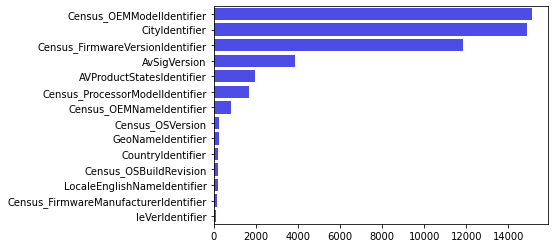

In [74]:
cardinality = df[categorical_col].nunique().sort_values(ascending=False)
high_cardinality = cardinality[cardinality > 100]
sns.barplot(y=high_cardinality.index, 
            x=high_cardinality.values, 
            orient='h', 
            color='b', 
            alpha=.8)

In [75]:
def get_rank(col_name):
    c_dict = Counter(df[col_name])
    return df[col_name].map(c_dict).replace(0, np.nan).rank()

In [76]:
Census_OEMModelIdentifier_Rank = get_rank('Census_OEMModelIdentifier')
Census_OEMModelIdentifier_Rank

0        59237.5
1        41450.5
2        10776.5
3        54706.5
4        63831.5
          ...   
89209    32913.0
89210    20779.5
89211     4423.5
89212        NaN
89213    83872.0
Name: Census_OEMModelIdentifier, Length: 89214, dtype: float64

In [77]:
#modeified from: https://wrosinski.github.io/fe_categorical_encoding/
        
def labelcount_encode(X, categorical_features, ascending=False):
    print('LabelCount encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        cat_feature_value_counts = X[cat_feature].fillna(0).value_counts()
        value_counts_list = cat_feature_value_counts.index.tolist()
        if ascending:
            # for ascending ordering
            value_counts_range = list(
                reversed(range(len(cat_feature_value_counts))))
        else:
            # for descending ordering
            value_counts_range = list(range(len(cat_feature_value_counts)))
        labelcount_dict = dict(zip(value_counts_list, value_counts_range))
        X_[cat_feature] = X[cat_feature].fillna(0).map(
            labelcount_dict)
    X_ = X_.add_suffix('_encoded')
    if ascending:
        X_ = X_.add_suffix('_ascending')
    else:
        X_ = X_.add_suffix('_descending')
    X_ = X_.astype(np.uint32)
    return X_

In [78]:
df_encoded = labelcount_encode(df, high_cardinality.index)
df_encoded.head()

LabelCount encoding: Index(['Census_OEMModelIdentifier', 'CityIdentifier',
       'Census_FirmwareVersionIdentifier', 'AvSigVersion',
       'AVProductStatesIdentifier', 'Census_ProcessorModelIdentifier',
       'Census_OEMNameIdentifier', 'Census_OSVersion', 'GeoNameIdentifier',
       'CountryIdentifier', 'Census_OSBuildRevision',
       'LocaleEnglishNameIdentifier', 'Census_FirmwareManufacturerIdentifier',
       'IeVerIdentifier'],
      dtype='object')


,Census_OEMModelIdentifier_encoded_descending,CityIdentifier_encoded_descending,Census_FirmwareVersionIdentifier_encoded_descending,AvSigVersion_encoded_descending,AVProductStatesIdentifier_encoded_descending,Census_ProcessorModelIdentifier_encoded_descending,Census_OEMNameIdentifier_encoded_descending,Census_OSVersion_encoded_descending,GeoNameIdentifier_encoded_descending,CountryIdentifier_encoded_descending,Census_OSBuildRevision_encoded_descending,LocaleEnglishNameIdentifier_encoded_descending,Census_FirmwareManufacturerIdentifier_encoded_descending,IeVerIdentifier_encoded_descending
0,131,445,529,3,0,323,2,3,63,57,3,0,3,0
1,546,249,22,5,7,151,2,1,0,133,1,0,3,0
2,5994,1054,6896,174,87,277,19,0,198,182,0,148,24,0
3,197,0,299,132,11,3,5,34,60,69,14,61,0,16
4,83,1027,102,45,0,139,3,25,30,37,26,28,2,0


In [79]:
df_encoded.shape

(89214, 14)

In [80]:
df.shape

(89214, 66)

In [81]:
df_clean = pd.concat([df.drop(high_cardinality.index, axis=1), df_encoded], axis=1)
df_clean.shape

(89214, 66)

In [82]:
df_clean.to_csv('../data/interim/train_clean.csv', index = False)